In [1]:
!pip install -e ..

Obtaining file:///home/yichao/Documents/repos/mediapipe_example_zoo
  Preparing metadata (setup.py) ... done
  Attempting uninstall: mediapipe-example-zoo
    Found existing installation: mediapipe-example-zoo 0.0.1
    Uninstalling mediapipe-example-zoo-0.0.1:
      Successfully uninstalled mediapipe-example-zoo-0.0.1
  DEPRECATION: Legacy editable install of mediapipe-example-zoo==0.0.1 from file:///home/yichao/Documents/repos/mediapipe_example_zoo (setup.py develop) is deprecated. pip 25.0 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457
  Running setup.py develop for mediapipe-example-zoo


In [2]:
import cv2
from mp_keypoint_solution.hand_and_arm_combined.mp_hand_and_arm_keypoint_solution import MPKeyPointSolution
from mp_keypoint_solution.hand_and_arm_combined.mp_landmark_index import SINGLE_HAND_ARM_LANDMARK_NAME2INDEX

image = cv2.imread("../data/image/whole_body/0001.jpg")
keypoint_solution = MPKeyPointSolution(static_image_mode=True)
arm_hand_world_landmarks, arm_hand_uv_landmarks = keypoint_solution.process(image, type="RIGHT_SIDE")

2024-08-23 20:15:09.018698: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-23 20:15:09.032185: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-23 20:15:09.047119: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-23 20:15:09.051602: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-23 20:15:09.062354: I tensorflow/core/platform/cpu_feature_guar

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
h, w, c = image.shape

In [5]:
xy_list = np.array([np.array([item.x, item.y]) for item in arm_hand_uv_landmarks])

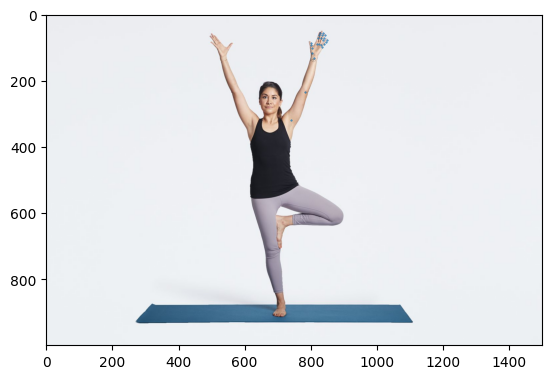

In [6]:
plt.imshow(cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB))
plt.scatter(xy_list[:, 0]*w, xy_list[:, 1]*h, s=0.2)

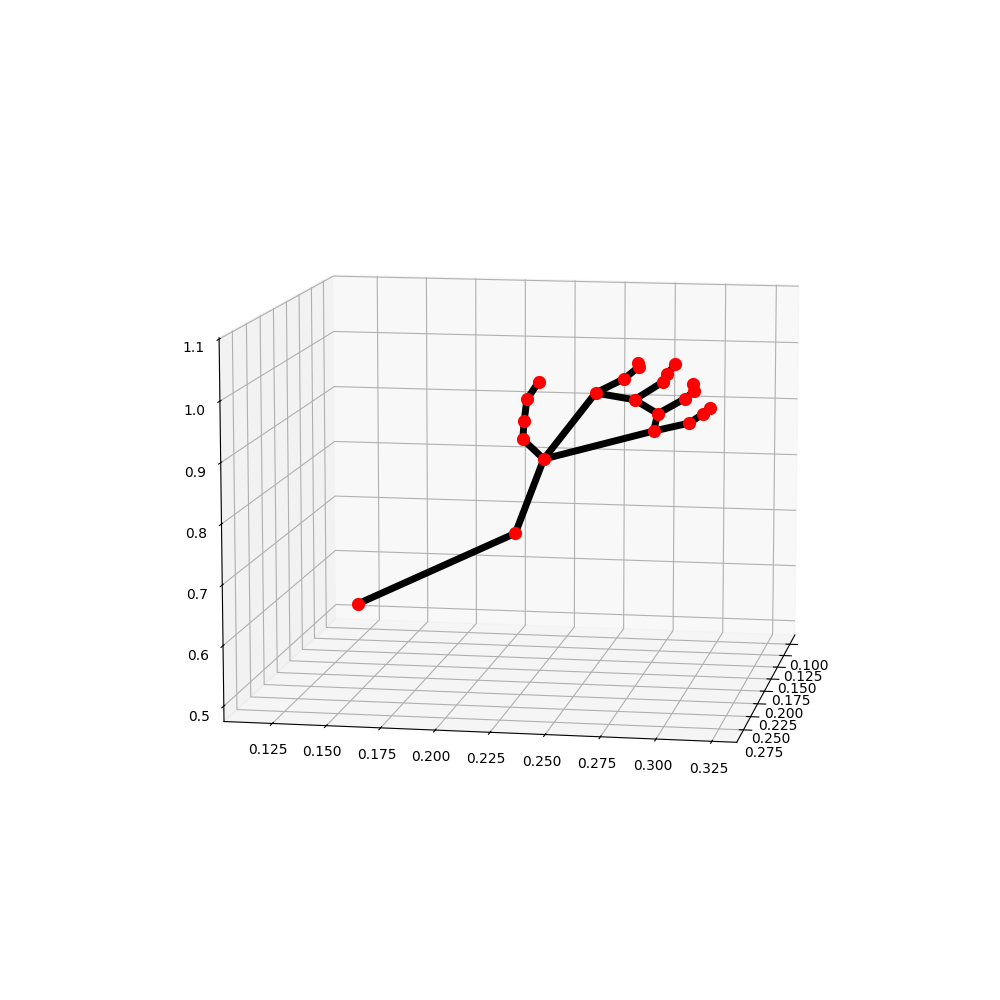

In [7]:

from mp_keypoint_solution.hand_and_arm_combined.visualize import plot3d_landmarks, SINGLE_ARM_HAND_CONNECTIONS
%matplotlib widget
# %matplotlib inline # use inline instead, if don't need interactive
plot3d_landmarks(arm_hand_world_landmarks, SINGLE_ARM_HAND_CONNECTIONS)
plt.show()